In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

### 1. Consider the data at:
    • url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/'
    • url2 = 'college-majors/recent-grads.csv'
    • url = url1 + url2
The variables are described at: https://github.com/fivethirtyeight/data/tree/master/college-majors <br>
    a) Read the csv file at URL into a data frame named df538. What are its dimensions? <br>
    b) Construct horizontal bar charts of the top ten majors sorted by median salary <br>
    c) Plot the bar charts again this time sorted by the salary of the 25th percentile. In each case plot just the variable you sorted on.

In [2]:
url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/'
url2 = 'college-majors/recent-grads.csv'
url = url1 + url2

In [3]:
# a) Read the csv file at URL into a data frame named df538. What are its dimensions?
df538 = pd.read_csv(url)
df538.shape

(173, 21)

The dataframe df538 has 173 rows and 21 columns.

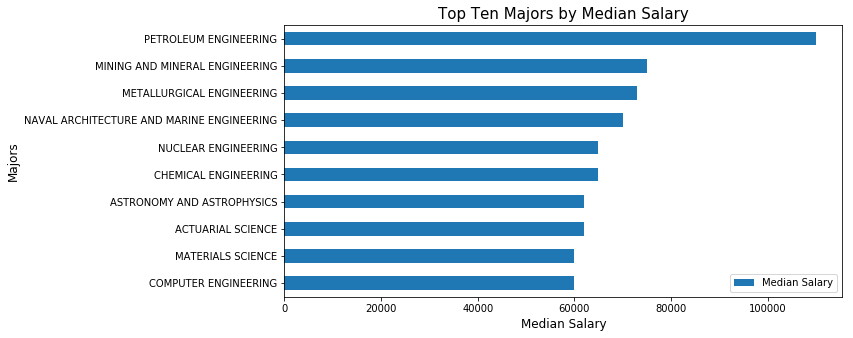

In [4]:
# b) Construct horizontal bar charts of the top ten majors sorted by median salary

topTenMajor = df538[['Major','Median']].sort_values('Median', ascending=False)[:10].set_index('Major')
topTenMajor.sort_values('Median', ascending=True).plot.barh(figsize=(10,5))

plt.title('Top Ten Majors by Median Salary', fontsize=15)
plt.xlabel('Median Salary', fontsize=12)
plt.ylabel('Majors', fontsize=12)
plt.legend(('Median Salary',));

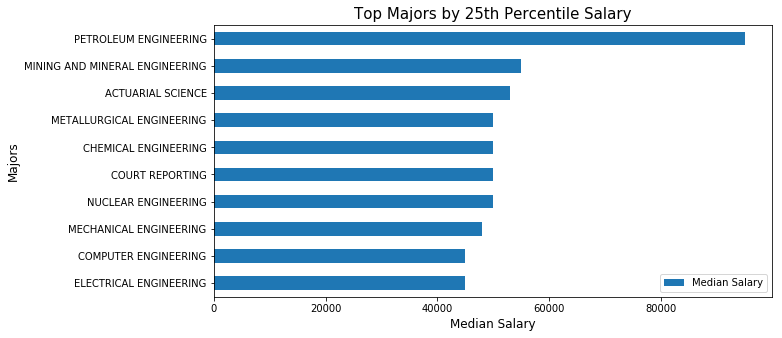

In [78]:
# c) Plot the bar charts again this time sorted by the salary of the 25th percentile. 
# In each case plot just the variable you sorted on.

p25 = df538[['Major', 'P25th']].sort_values('P25th', ascending=False).set_index('Major')[:10]
p25.sort_values('P25th', ascending=True).plot.barh(figsize=(10,5))

plt.title('Top Majors by 25th Percentile Salary', fontsize=15)
plt.xlabel('Median Salary', fontsize=12)
plt.ylabel('Majors', fontsize=12)
plt.legend(('Median Salary',));

### 2. Using the csv file at location http://pages.stern.nyu.edu/~dbackus/Data/debt.csv, create a data frame called debt and do the following with Year as index:
    a) Plot each country’s debt against Year using a suitable plot method. Change the line width to 2.
    b) First create figure and axis objects (empty) with plt.subplots(). Then graph public indebtness over the years using our debt data and the axis object we just created. Color the lines red, blue and green. By calling a method on the axis object, change the lower limit on the y axis to zero.
    c) Make the line for Argentina thicker than the others. Hint: Do this by plotting a separate line applied to the same axis object.

In [5]:
debt = pd.read_csv('http://pages.stern.nyu.edu/~dbackus/Data/debt.csv')
debt

,ARG,DEU,GRC,Year
0,137.5,59.2,98.1,2002
1,106.0,64.6,94.9,2004
2,61.8,66.3,102.9,2006
3,47.0,64.9,108.8,2008
4,39.1,80.3,145.7,2010
5,37.3,79.0,156.5,2012
6,48.6,73.1,177.2,2014


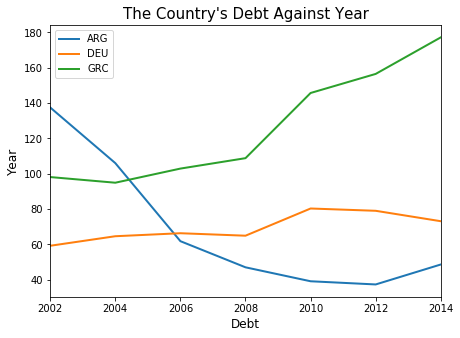

In [7]:
# a) Plot each country’s debt against Year using a suitable plot method. Change the line width to 2.

debt.plot(kind='line', x='Year', linewidth=2, figsize=(7, 5))
plt.title('The Country\'s Debt Against Year', fontsize=15)
plt.xlabel('Debt', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.legend();

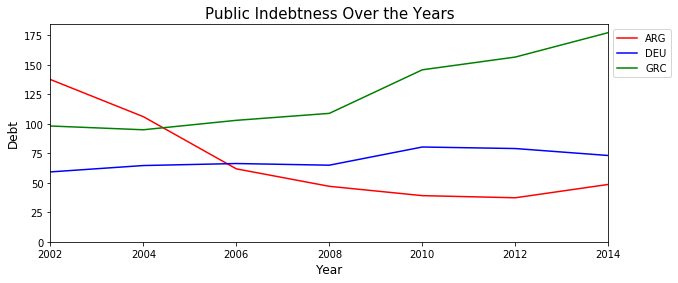

In [18]:
# b) First create figure and axis objects (empty) with plt.subplots(). 
# Then graph public indebtness over the years using our debt data and the axis object we just created. 
# Color the lines red, blue and green. By calling a method on the axis object, change the lower limit on the y axis to zero.

fig, ax = plt.subplots(figsize=(10, 4))

debt.plot(x='Year', ax=ax, color=['red', 'blue', 'green'])
ax.set_ylim(0)
ax.set_title('Public Indebtness Over the Years', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Debt', fontsize=12)
ax.legend(bbox_to_anchor=(1, 1));

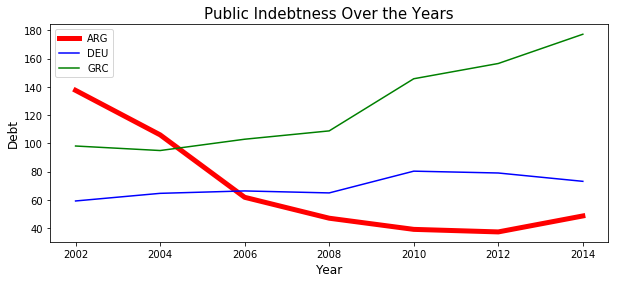

In [19]:
# c) Make the line for Argentina thicker than the others. 
# Hint: Do this by plotting a separate line applied to the same axis object.

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot('Year', 'ARG', data=debt, color='red', lw=5)
ax.plot('Year', 'DEU', data=debt, color='blue')
ax.plot('Year', 'GRC', data=debt, color='green')
ax.legend()
ax.set_title('Public Indebtness Over the Years', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Debt', fontsize=12);

### 3
a) Create a bar chart for the number of employees in each size category. <br>
b) Create figure and axis objects. Add a horizontal bar chart of the number of firms in each category to the axis object you created. Color the bars red. Use the style 'seaborn-pastel'.

In [20]:
data = {'Size': ['1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 to 999', '1000 to 2499', '2500 to 4999', '5000 to 9999', '10000+'], 'Firms': [2846416, 1020772, 598153, 373345, 115544, 63845, 19389, 9588, 6088, 2287, 1250, 1357], 'Emp': [5998912, 6714924, 8151891, 11425545, 8055535, 9788341, 6611734, 6340775, 8321486, 6738218, 6559020, 32556671]}
bds = pd.DataFrame(data) 
bds = bds.set_index('Size') 
bds.head()

,Firms,Emp
Size,,
1 to 4,2846416,5998912
5 to 9,1020772,6714924
10 to 19,598153,8151891
20 to 49,373345,11425545
50 to 99,115544,8055535


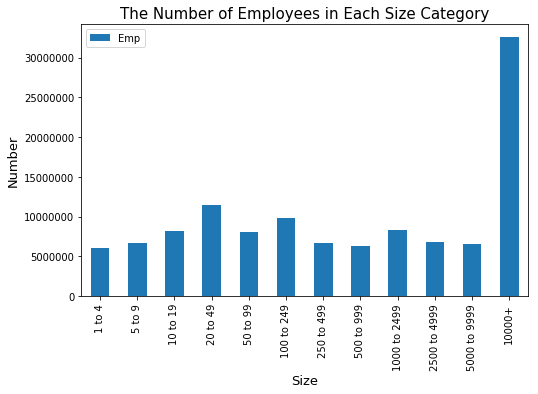

In [21]:
# a) Create a bar chart for the number of employees in each size category.

bds['Emp'].plot(kind='bar', figsize=(8, 5))
ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y')
plt.title('The Number of Employees in Each Size Category', fontsize=15)
plt.ylabel('Number', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.legend();

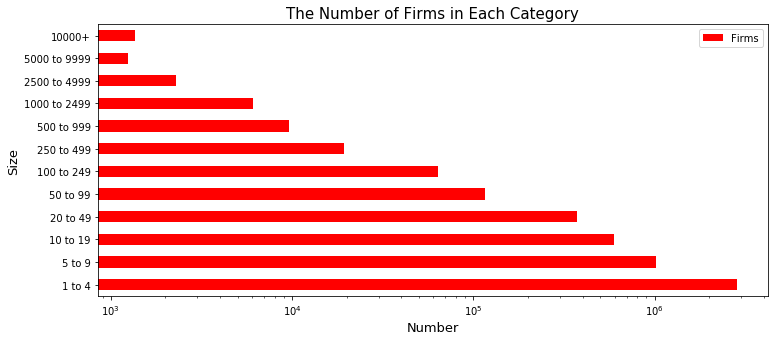

In [25]:
# b) Create figure and axis objects. 
# Add a horizontal bar chart of the number of firms in each category to the axis object you created. 
# Color the bars red. Use the style 'seaborn-pastel'.

fig, ax = plt.subplots(figsize=(12, 5))

plt.ticklabel_format(style='plain', axis='x')
plt.style.use('seaborn-pastel')

bds['Firms'].plot(kind='barh', color='r')
ax.set_xscale('log')
ax.set_title('The Number of Firms in Each Category', fontsize=15)
ax.set_ylabel('Size', fontsize=13)
ax.set_xlabel('Number', fontsize=13)
ax.legend();

### 4. These numbers are GDP per person in thousands of US dollars, 2008 to 2014, variable PPPPC in the IMF’s World Economic Outlook Database.
a) For every year, plot the GDP of each country in a stacked bar chart. Use ‘red’ for Brazil, ‘blue’ for USA, ‘yellow’ for Japan. <br>
b) Change the background color of the plot, make the title larger and in bold face. <br>
c) Reverse the axes, i.e. let year be y axis and GDP be x. Apply a different color for x and y ticks. Place the legend outside the plot.

In [26]:
data = {'BRA': [13.37, 13.30, 14.34, 15.07, 15.46, 15.98, 16.10], 'JPN': [33.43, 31.83, 33.71, 34.29, 35.60, 36.79, 37.39], 'USA': [48.30, 46.91, 48.31, 49.72, 51.41, 52.94, 54.60], 'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014]}
weo = pd.DataFrame(data)
weo

,BRA,JPN,USA,Year
0,13.37,33.43,48.30,2008
1,13.30,31.83,46.91,2009
2,14.34,33.71,48.31,2010
3,15.07,34.29,49.72,2011
4,15.46,35.60,51.41,2012
5,15.98,36.79,52.94,2013
6,16.10,37.39,54.60,2014


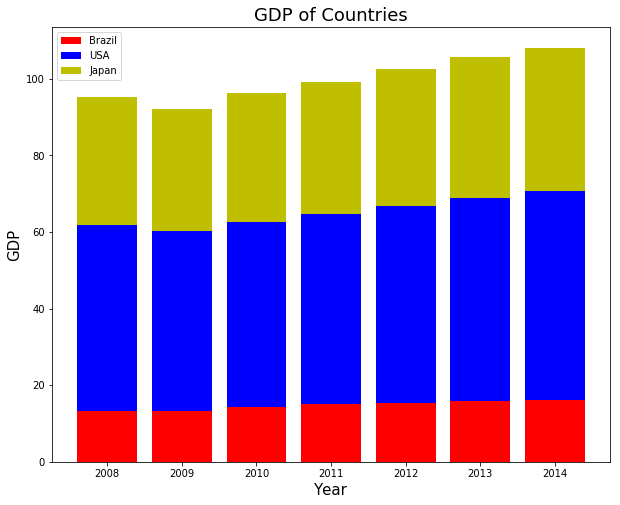

In [27]:
# a) For every year, plot the GDP of each country in a stacked bar chart. 
# Use ‘red’ for Brazil, ‘blue’ for USA, ‘yellow’ for Japan.

fig, ax = plt.subplots(figsize=(10, 8))

a = plt.bar(weo['Year'], weo['BRA'], color='r')
b = plt.bar(weo['Year'], weo['USA'], color='b', bottom = weo['BRA'])
c = plt.bar(weo['Year'], weo['JPN'], color='y', bottom = weo['BRA'] + weo['USA'])
ax.legend([a, b, c], ['Brazil', 'USA', 'Japan'])
ax.set_title('GDP of Countries', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('GDP', fontsize=15);

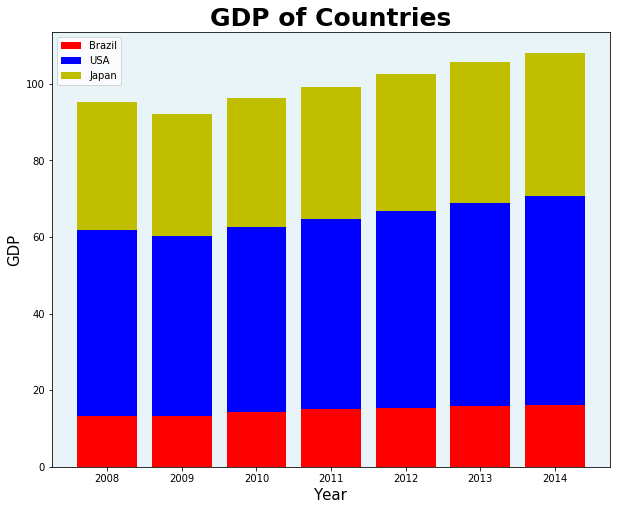

In [28]:
# b) Change the background color of the plot, make the title larger and in bold face.

fig, ax = plt.subplots(figsize=(10, 8))

a = plt.bar(weo['Year'], weo['BRA'], color='r')
b = plt.bar(weo['Year'], weo['USA'], color='b', bottom = weo['BRA'])
c = plt.bar(weo['Year'], weo['JPN'], color='y', bottom = weo['BRA'] + weo['USA'])
ax.legend([a, b, c], ['Brazil', 'USA', 'Japan'])
ax.set_title('GDP of Countries', fontsize=25, fontweight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('GDP', fontsize=15)
ax.set_facecolor((0.91, 0.957, 0.973));

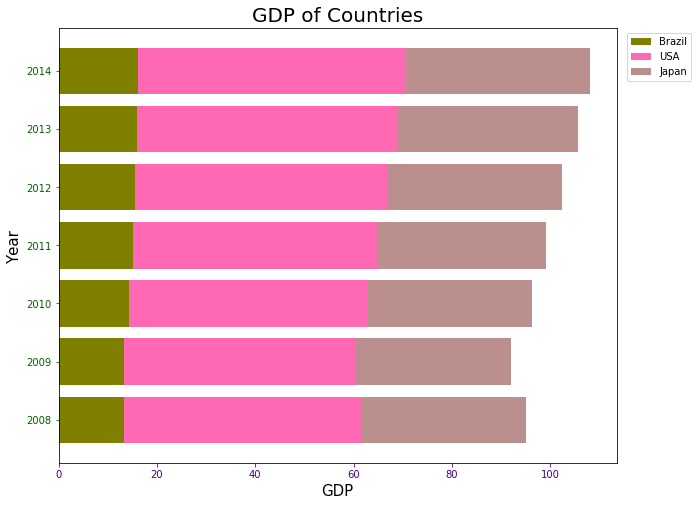

In [30]:
# c) Reverse the axes, i.e. let year be y axis and GDP be x.
# Apply a different color for x and y ticks. Place the legend outside the plot.

fig, ax = plt.subplots(figsize=(10, 8))

a = plt.barh(weo['Year'], weo['BRA'], color='olive')
b = plt.barh(weo['Year'], weo['USA'], color='hotpink', left = weo['BRA'])
c = plt.barh(weo['Year'], weo['JPN'], color='rosybrown', left = weo['BRA'] + weo['USA'])

ax.legend([a, b, c], ['Brazil', 'USA', 'Japan'], bbox_to_anchor=(1.01, 1))
ax.set_title('GDP of Countries', fontsize=20)
ax.set_ylabel('Year', fontsize=15)
ax.set_xlabel('GDP', fontsize=15)
ax.tick_params(axis='x', colors='indigo')
ax.tick_params(axis='y', colors='darkgreen');

### 5. Using the given csv file(‘company.csv’), complete the following tasks.
a) Create figure and axis objects. For this, you will want two side-by-side plots with 1 row and 2 columns. <br>
b) On the left chart, plot the number of employees at each company over time. In the right chart, plot the percent female over time. <br> 
c) Change the size of the plot and create titles for each plot to make it look presentable. <br>
d) Change the style to ‘fivethirtyeight’.

In [31]:
df = pd.read_csv('company.csv')
df.head()

,company,year,employees,percent_female
0,Alphabet,2008,177445,0.404177
1,Alphabet,2009,180913,0.404403
2,Alphabet,2010,191435,0.402792
3,Alphabet,2011,205113,0.400248
4,Alphabet,2012,216191,0.396543


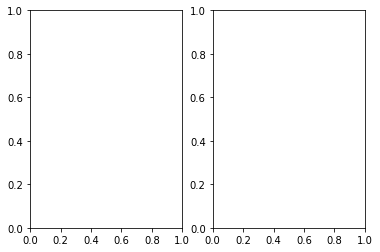

In [32]:
# a) Create figure and axis objects. For this, you will want two side-by-side plots with 1 row and 2 columns.

fig, ax = plt.subplots(1, 2)

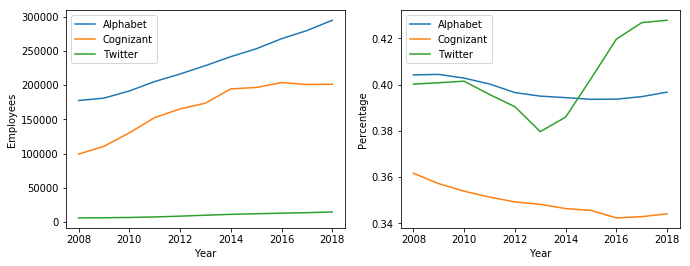

In [49]:
# b) On the left chart, plot the number of employees at each company over time. 
# In the right chart, plot the percent female over time.

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

alp = df.loc[df['company'] == 'Alphabet'][['employees', 'year']]
cog = df.loc[df['company'] == 'Cognizant'][['employees', 'year']]
twi = df.loc[df['company'] == 'Twitter'][['employees', 'year']]

alpp = df.loc[df['company'] == 'Alphabet'][['percent_female', 'year']]
cogp = df.loc[df['company'] == 'Cognizant'][['percent_female', 'year']]
twip = df.loc[df['company'] == 'Twitter'][['percent_female', 'year']]

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].plot(alp['year'], alp['employees'])
ax[0].plot(cog['year'], cog['employees'])
ax[0].plot(twi['year'], twi['employees'])
ax[0].legend(['Alphabet', 'Cognizant', 'Twitter'])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Employees')

ax[1].plot(alpp['year'], alpp['percent_female'])
ax[1].plot(cogp['year'], cogp['percent_female'])
ax[1].plot(twip['year'], twip['percent_female'])
ax[1].legend(['Alphabet', 'Cognizant', 'Twitter'])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Percentage');

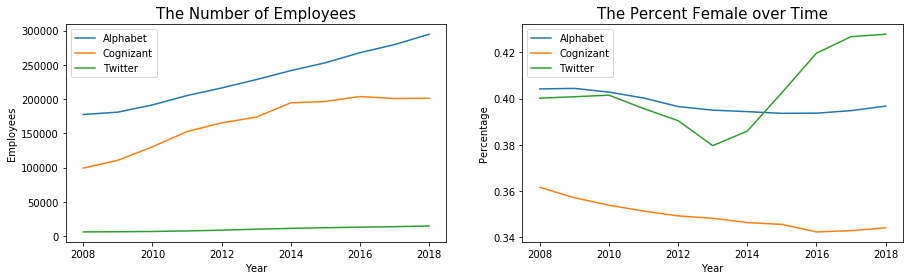

In [50]:
# c) Change the size of the plot and create titles for each plot to make it look presentable.

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].plot(alp['year'], alp['employees'])
ax[0].plot(cog['year'], cog['employees'])
ax[0].plot(twi['year'], twi['employees'])
ax[0].legend(['Alphabet', 'Cognizant', 'Twitter'])
ax[0].set_title('The Number of Employees', fontsize=15)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Employees')

ax[1].plot(alpp['year'], alpp['percent_female'])
ax[1].plot(cogp['year'], cogp['percent_female'])
ax[1].plot(twip['year'], twip['percent_female'])
ax[1].legend(['Alphabet', 'Cognizant', 'Twitter'])
ax[1].set_title('The Percent Female over Time', fontsize=15)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Percentage');

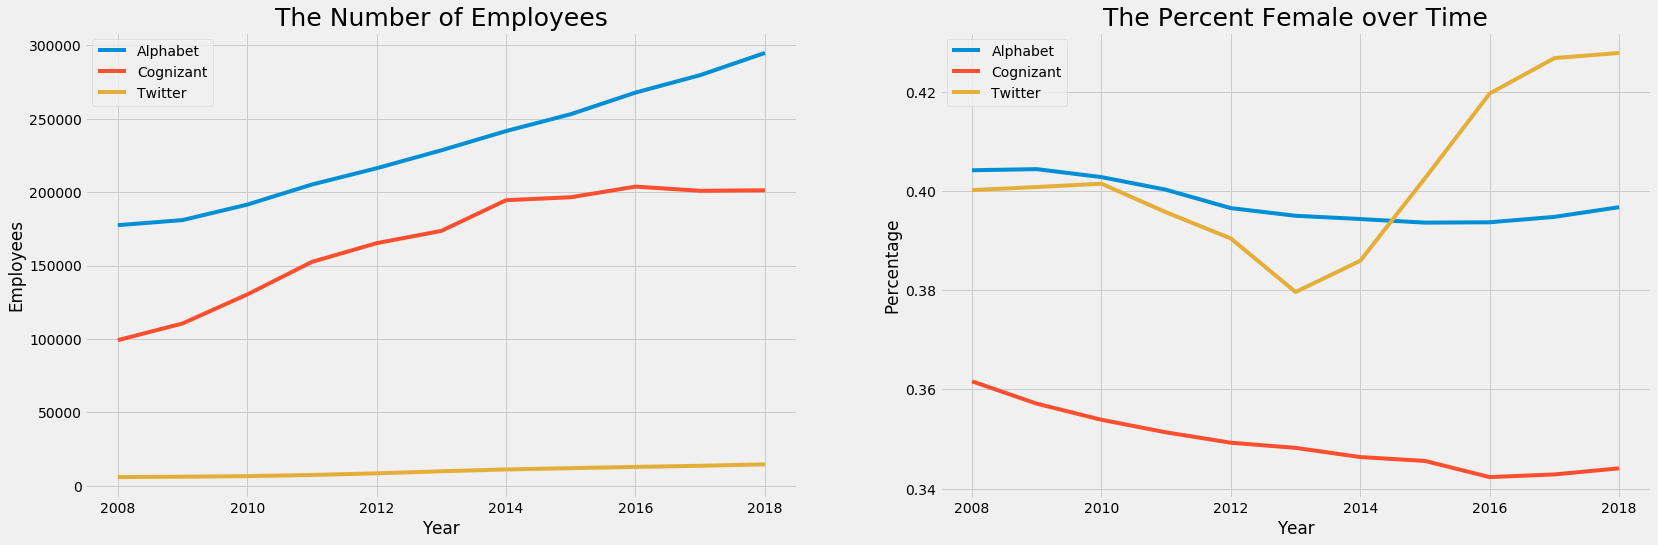

In [42]:
# d) Change the style to ‘fivethirtyeight’.

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
plt.style.use('fivethirtyeight')

ax[0].plot(alp['year'], alp['employees'])
ax[0].plot(cog['year'], cog['employees'])
ax[0].plot(twi['year'], twi['employees'])
ax[0].legend(['Alphabet', 'Cognizant', 'Twitter'])
ax[0].set_title('The Number of Employees', fontsize=25)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Employees')

ax[1].plot(alpp['year'], alpp['percent_female'])
ax[1].plot(cogp['year'], cogp['percent_female'])
ax[1].plot(twip['year'], twip['percent_female'])
ax[1].legend(['Alphabet', 'Cognizant', 'Twitter'])
ax[1].set_title('The Percent Female over Time', fontsize=25)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Percentage');